<h1><center>ECommerce Data Analysis</center></h1>

Christopher Garcia

__Date:__ December 13, 2021

**Objective:**



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
# Load statsmodels as alias “sm”
# import statsmodels.api as sm

### Data Importing and Pre-processing

Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
Clean, wrangle, and handle missing data
Transform data appropriately using techniques such as aggregation, normalization, and feature construction
Reduce redundant data and perform need based discretization
- check dataset
- make sure data is stored in either quantitative or categorical column values(int, float, object, string, etc)
- check for null/missing values

describe the data, type of data, the different variables we see,

In [2]:
# load & inspect dataset
# identify variable types
df = pd.read_csv('online_shoppers_intention.csv')
df.head(15)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False
5,0,0.0,0.0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2.0,2,1,3,Returning_Visitor,False,False
6,0,0.0,0.0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2.0,4,3,3,Returning_Visitor,False,False
7,1,0.0,0.0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1.0,2,1,5,Returning_Visitor,True,False
8,0,0.0,0.0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2.0,2,2,3,Returning_Visitor,False,False
9,0,0.0,0.0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2.0,4,1,2,Returning_Visitor,False,False


In [3]:
# checking data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12202 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12195 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12207 non-null  float64
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.isnull().sum()

Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

For this dataset, we notice that there are multiple missing values. We can do more in depth to look at what these values are within the column variables.

In [6]:
df['Informational'].unique()

array([ 0.,  1.,  2.,  4., nan, 16.,  5.,  3., 14.,  6., 12.,  7.,  9.,
       10.,  8., 11., 24., 13.])

In [8]:
df['PageValues'].unique()

array([ 0.        , 54.17976426,         nan, ..., 78.81172527,
        3.68540082, 12.24171745])

In [9]:
df['OperatingSystems'].unique()

array([ 1.,  2.,  4.,  3.,  7., nan,  6.,  8.,  5.])

For this project, we'll remove the rows containing any missing values and store our dataframe into a new variable.

In [10]:
shoppers_df = df.dropna()

In [11]:
shoppers_df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Using the `.isnull().sum()` method we notice that all missing values were removed. Now we can explore the dataset and look for any relationships as well as patterns between the variables. We can normalize and scale the dataset later when we're ready to build a model. 

In [12]:
shoppers_df.head(15)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False
5,0,0.0,0.0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2.0,2,1,3,Returning_Visitor,False,False
6,0,0.0,0.0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2.0,4,3,3,Returning_Visitor,False,False
7,1,0.0,0.0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1.0,2,1,5,Returning_Visitor,True,False
8,0,0.0,0.0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2.0,2,2,3,Returning_Visitor,False,False
9,0,0.0,0.0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2.0,4,1,2,Returning_Visitor,False,False


The README.txt file gives us an explanation of the data types in our dataset. However, some of the variables don't have an explanation. We'll have to do some research and list below the different definitions for some of the variables we want to analyze. 

### Data Analysis and Visualization

 - condense information
- get sense of spread/central tendancy/range
- frequencies of each category
- basic visualizations

Identify categorical, ordinal, and numerical variables within data
Provide measures of centrality and distribution with visualizations

Diagnose for correlations between variables and determine independent and dependent variables
Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest

### [Quantitative Analysis]

We'll start off by conducting summary statistics on single quantitative variables.

In [16]:
shoppers_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


In [15]:
# visualize only the variables you find more interesting for the analysis/model you want to run
shoppers_df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000,11948.000000
mean,2.314195,80.975454,0.502343,34.571237,31.661952,1192.344645,0.022163,0.043053,5.938418,0.061383,2.124540,2.357884,3.143873,4.068966
std,3.318662,176.278338,1.270053,141.688119,44.245077,1907.556355,0.048451,0.048577,18.719907,0.198728,0.912818,1.722570,2.399180,4.027186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.075000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.112500,0.000000,0.000000,18.000000,599.216667,0.003107,0.025109,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,94.000000,0.000000,0.000000,38.000000,1461.752083,0.016667,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


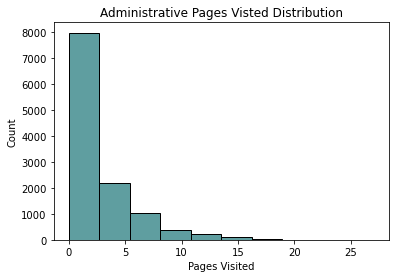

In [24]:
# lets look at the amount of pages visited per administrative, informational, product related
plt.hist(shoppers_df['Administrative'], edgecolor='black', color='cadetblue')
plt.title('Administrative Pages Visted Distribution')
plt.xlabel('Pages Visited')
plt.ylabel('Count')
plt.show()

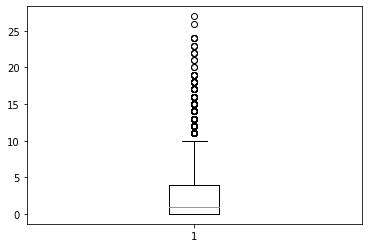

In [34]:
plt.boxplot(shoppers_df['Administrative'])
plt.show()

Interpretation

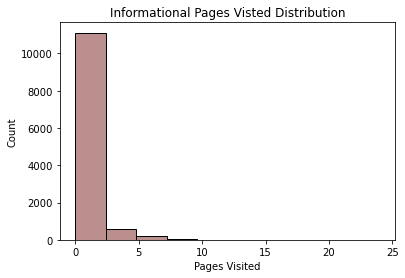

In [28]:
plt.hist(shoppers_df['Informational'], edgecolor='black', color='rosybrown')
plt.title('Informational Pages Visted Distribution')
plt.xlabel('Pages Visited')
plt.ylabel('Count')
plt.show()

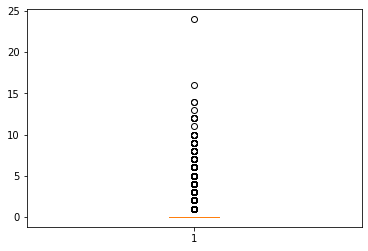

In [33]:
plt.boxplot(shoppers_df['Informational'])
plt.show()

Interpretation

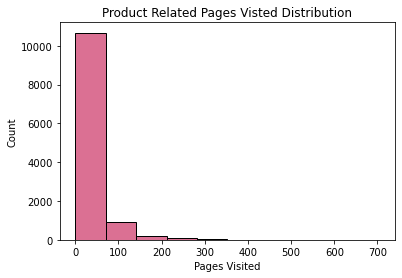

In [29]:
plt.hist(shoppers_df['ProductRelated'], edgecolor='black', color='palevioletred')
plt.title('Product Related Pages Visted Distribution')
plt.xlabel('Pages Visited')
plt.ylabel('Count')
plt.show()

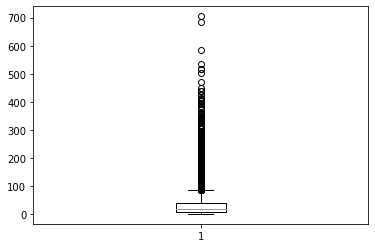

In [35]:
plt.boxplot(shoppers_df['ProductRelated'])
plt.show()

What the distributions tell us. 

In [37]:
# histogram on quantitative variables 
# to compare distributions
#plt.boxplot([shoppers_df['Administrative'], shoppers_df['Informational'], shoppers_df['ProductRelated']], vert=False )
#plt.show()

### [Categorical Analysis]

### Data Analytics

Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables
Train, test, and provide accuracy and evaluation metrics for model results